In [1]:
from scripts.utils import utils
from scripts.model import OR_model

import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import time
import gurobipy as gp
from gurobipy import GRB

In [2]:
def readData(pre=True):
    print("\n\n", "-"*10, "Reading data", "-"*10)
    df = pd.read_csv('dataset.csv')

    print("Data size:", df.shape)

    print("\n\n", "-"*10, "Do precalculations", "-"*10)
    start = time.time()

    utils_ = utils(df, pre=pre)

    print(f"Finish, uses {time.time() - start:.5f} seconds")

    return df, utils_

In [3]:
def getAllowedMoves(df, utils):
    B = df['Block'].unique()
    P_set = set()

    for b1, b2 in itertools.product(B, repeat=2):
        o1 = utils.getRoom(b1)
        o2 = utils.getRoom(b2)
        if abs(o1 - o2) <= 10:
            P_set.add((b1,b2))

    return list(P_set)

In [18]:
def getAllowedMoves2(df, utils):
    B = df['Block'].unique()
    P_set = set()
    
    weekend_days = {6, 7}      
    allowed_weekend_moves = {5, 6, 7}  

    for b1, b2 in itertools.product(B, repeat=2):
        o1 = utils.getRoom(b1)
        o2 = utils.getRoom(b2)
        
        if abs(o1 - o2) > 10:
            continue

        d1 = utils.getDay(b1)
        d2 = utils.getDay(b2)
        
        if (d1 in weekend_days or d2 in weekend_days) and not (d1 in allowed_weekend_moves and d2 in allowed_weekend_moves):
            continue
        
        P_set.add((b1, b2))
    
    return list(P_set)

In [19]:
P = getAllowedMoves2(df, utils)
P

[('(d5,o42)', '(d7,o49)'),
 ('(d1,o52)', '(d5,o47)'),
 ('(d2,o35)', '(d2,o34)'),
 ('(d5,o30)', '(d7,o22)'),
 ('(d2,o25)', '(d5,o27)'),
 ('(d1,o37)', '(d4,o34)'),
 ('(d4,o21)', '(d5,o12)'),
 ('(d2,o45)', '(d3,o42)'),
 ('(d3,o28)', '(d4,o23)'),
 ('(d5,o20)', '(d5,o18)'),
 ('(d3,o27)', '(d3,o33)'),
 ('(d2,o34)', '(d2,o44)'),
 ('(d2,o9)', '(d2,o16)'),
 ('(d4,o11)', '(d5,o19)'),
 ('(d1,o14)', '(d2,o12)'),
 ('(d1,o44)', '(d1,o51)'),
 ('(d1,o14)', '(d1,o5)'),
 ('(d1,o38)', '(d1,o29)'),
 ('(d4,o48)', '(d2,o49)'),
 ('(d4,o4)', '(d4,o3)'),
 ('(d3,o30)', '(d5,o31)'),
 ('(d4,o9)', '(d1,o14)'),
 ('(d2,o14)', '(d1,o6)'),
 ('(d2,o35)', '(d3,o29)'),
 ('(d2,o30)', '(d2,o23)'),
 ('(d5,o33)', '(d2,o25)'),
 ('(d6,o9)', '(d7,o12)'),
 ('(d4,o18)', '(d3,o9)'),
 ('(d4,o27)', '(d2,o21)'),
 ('(d7,o37)', '(d5,o41)'),
 ('(d5,o33)', '(d4,o39)'),
 ('(d2,o1)', '(d1,o2)'),
 ('(d2,o42)', '(d4,o44)'),
 ('(d3,o2)', '(d5,o1)'),
 ('(d6,o41)', '(d5,o44)'),
 ('(d5,o18)', '(d3,o11)'),
 ('(d1,o25)', '(d2,o32)'),
 ('(d5,o25)',

In [20]:
df, utils_ = readData(pre=True)
P = getAllowedMoves2(df, utils_)

# Hyperparameters
F = ['1']
l_v = [0,0,0,0,0]
u_v = [47,47,47,47,47]



 ---------- Reading data ----------
Data size: (1456, 7)


 ---------- Do precalculations ----------
Finish, uses 31.95315 seconds


In [ ]:
model = OR_model(df=df, P=P, F=F, l_v=l_v, u_v=u_v, alpha=0, utils=utils_)
model.init()
model.optimize()



 ---------- Creating model ----------
New model created successfully.


 ---------- Reading sets from df and precompute ----------
Finish, uses 0.00051 seconds


 ---------- Setting decision variables ----------
Finish, uses 0.08453 seconds


 ---------- Setting constraints ----------
Setting additional constraints
Finish, uses 1.29446 seconds
Setting constraints (2)
Finish, uses 1.22846 seconds
Setting constraints (3)
Finish, uses 20.11749 seconds
Setting constraints (4)
Finish, uses 31.82157 seconds
Setting constraints (5)
Finish, uses 61.26678 seconds
---------- Setting objection ----------
Finish, uses 0.00134 seconds


 ---------- Optimizing ----------
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D81)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 3654 rows, 32435 columns and 511848 nonzeros
Model fingerprint: 0xa23de1ca
Variable types: 0 continuous, 32435 integer (3

In [14]:
model.saveModel("./saves/P_v2")



 ---------- Saving model and solution ----------
Model saved successfully as './saves/P_v2.mps'
Solution saved successfully as './saves/P_v2.sol'


[311.   327.   335.5  331.25 323.   289.   278.  ]
[278.   311.   327.   335.5  331.25 323.   289.  ]


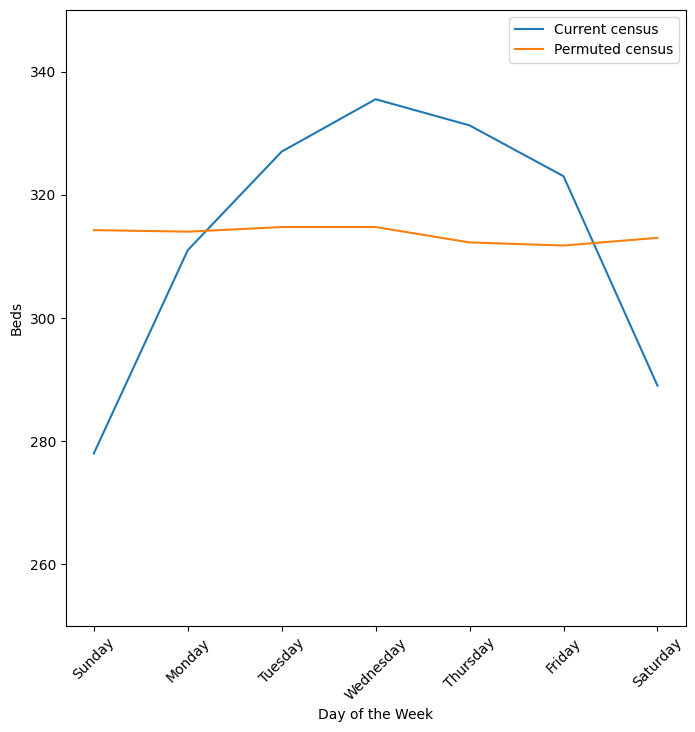

In [16]:
model.resultChart()

In [7]:
model = OR_model(df=df, utils=utils_, model_path="./saves/alpha_0d4")



 ---------- Loading model from './saves/alpha_0d4.mps'... ----------
Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-24
Read MPS format model from file ./saves/alpha_0d4.mps
Reading time = 0.13 seconds
OR: 3654 rows, 48147 columns, 759976 nonzeros
Model loaded successfully!
Read solution from file ./saves/alpha_0d4.sol
Solution loaded successfully from './saves/alpha_0d4.sol'


In [7]:
model.optimize()



 ---------- Optimizing ----------
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D81)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 3654 rows, 48147 columns and 759976 nonzeros
Model fingerprint: 0x85055139
Variable types: 0 continuous, 48147 integer (48118 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]

Loaded user MIP start with objective 181.5

Presolve removed 189 rows and 0 columns
Presolve time: 0.95s
Presolved: 3465 rows, 48147 columns, 579159 nonzeros
Variable types: 0 continuous, 48147 integer (48118 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.07s

Barrier statistics:
 AA' NZ     : 2.241e+05
 Factor NZ  : 1.071e+06 (roughly 30 MB of me

In [15]:
model.printResults()


Optimal Solution Found!

Decision Variables:
x_p[(d2,o1),(d1,o2)] = 1.0
x_p[(d6,o52),(d5,o50)] = 1.0
x_p[(d3,o22),(d2,o30)] = 1.0
x_p[(d7,o39),(d2,o39)] = 1.0
x_p[(d4,o2),(d6,o4)] = 1.0
x_p[(d4,o6),(d6,o13)] = 1.0
x_p[(d4,o16),(d6,o22)] = 1.0
x_p[(d4,o34),(d3,o34)] = 1.0
x_p[(d3,o11),(d1,o4)] = 1.0
x_p[(d5,o9),(d4,o9)] = 1.0
x_p[(d3,o48),(d2,o52)] = 1.0
x_p[(d1,o49),(d3,o51)] = 1.0
x_p[(d4,o50),(d1,o49)] = 1.0
x_p[(d3,o49),(d4,o44)] = 1.0
x_p[(d6,o15),(d6,o19)] = 1.0
x_p[(d2,o27),(d3,o24)] = 1.0
x_p[(d4,o7),(d6,o6)] = 1.0
x_p[(d5,o49),(d4,o42)] = 1.0
x_p[(d5,o52),(d6,o52)] = 1.0
x_p[(d1,o9),(d1,o17)] = 1.0
x_p[(d3,o5),(d2,o1)] = 1.0
x_p[(d5,o31),(d4,o36)] = 1.0
x_p[(d4,o40),(d7,o34)] = 1.0
x_p[(d5,o37),(d6,o41)] = 1.0
x_p[(d6,o43),(d5,o43)] = 1.0
x_p[(d2,o13),(d1,o19)] = 1.0
x_p[(d3,o13),(d2,o21)] = 1.0
x_p[(d5,o28),(d6,o33)] = 1.0
x_p[(d5,o51),(d6,o48)] = 1.0
x_p[(d2,o23),(d1,o29)] = 1.0
x_p[(d6,o7),(d6,o8)] = 1.0
x_p[(d1,o13),(d7,o17)] = 1.0
x_p[(d5,o18),(d5,o8)] = 1.0
x_p[(d3,o41),

In [5]:
model.resultChart()

NameError: name 'model' is not defined

In [12]:
import re
s = "(a,b),(c,d)"
a,b = re.findall(r'\([^\(\)]*\)', s)
print(a,b)

(a,b) (c,d)
